In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
directory = os.getcwd()

def process_images(directory, subfolder):

    # Assign features as the raw RGB pixel values and the labels as 'yes' or 'no'
    labels = []
    pixels = []

    if subfolder == '/no':
        label = 0
    else:
        label = 1

    # Go into the image folder
    os.chdir(directory + subfolder)

    for file in os.listdir(directory + subfolder):

        # Read image file, resize, and output RGB values 
        img = cv2.imread(file)
        img_array = cv2.resize(img, (128,128)).flatten()

        labels.append(label)
        pixels.append(img_array)

    # Return from the image folder 
    os.chdir('..')
    return pixels, labels 

pixels_no, labels_no = process_images(directory, '/no')
pixels_yes, labels_yes = process_images(directory, '/yes')


In [3]:
# Perform cross-validation to find best number of neighbors
neighbors = np.arange(1, 101, 2)
acc = []

for i in range(0,len(neighbors)):
    model = KNeighborsClassifier(n_neighbors=neighbors[i])
    X = np.concatenate((pixels_no, pixels_yes), axis=0)
    y = np.concatenate((labels_no, labels_yes), axis=0)

    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    acc.append(np.mean(scores) * 100)

Text(0.5, 1.0, 'KNN Classifier Performance')

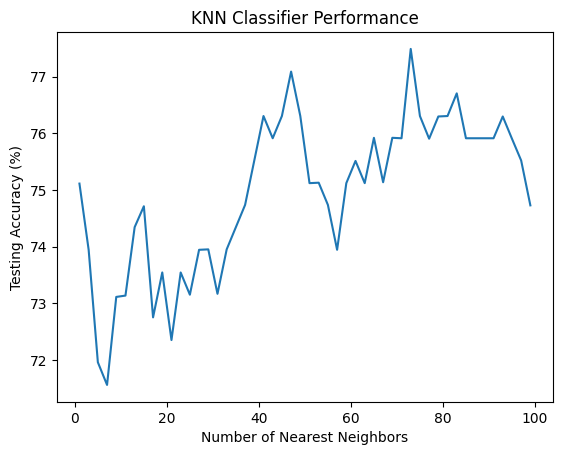

In [4]:
plt.plot(neighbors,acc)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Testing Accuracy (%)')
plt.title('KNN Classifier Performance')

In [5]:
print("Highest Cross-Validation Accuracy: {:.2f}% at {:.0f} nearest neighbors".format(np.max(acc), neighbors[acc.index(np.max(acc))]))

Highest Cross-Validation Accuracy: 77.49% at 73 nearest neighbors
